In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_location = './data/data.csv'

In [3]:
data_df = pd.read_csv(data_location)
%store data_df

Stored 'data_df' (DataFrame)


In [4]:
%store -r data_df

In [5]:
#Convert the topics into a list
data_df["Topic"] = data_df["Topic"].apply(eval)

In [6]:
#Convert lists into Pandas series so they can be analized
def list_to_series(series):
 return pd.Series([x for _list in series for x in _list])

In [7]:
topic_counts = list_to_series(data_df["Topic"]).value_counts()
topic_counts.to_excel('./data/topic-counts.xlsx')

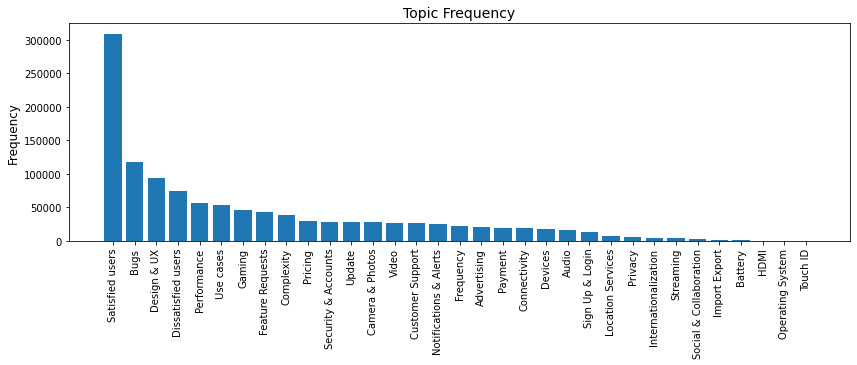

In [29]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(list_to_series(data_df["Topic"]).value_counts().index,
        list_to_series(data_df["Topic"]).value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Topic Frequency", size = 14)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

## Sentiment Distribution

<AxesSubplot:xlabel='Sentiment'>

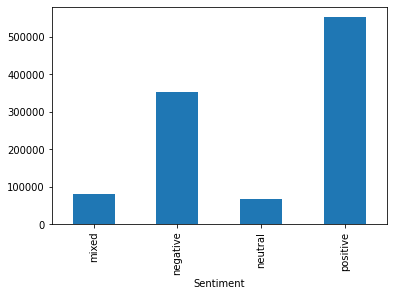

In [24]:
sentiment_distribution = data_df.groupby(['Sentiment']).size()

sentiment_distribution.plot.bar()

In [23]:
type(sentiment_distribution)

pandas.core.series.Series

## Exploring relationships between sentiment and topic

In [19]:
def boolean_df(item_lists, unique_items):# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [20]:
unique_items_topics = list_to_series(data_df["Topic"]).value_counts().index.tolist()
unique_items_sentiment = data_df["Sentiment"].unique()

data_bool_topics = boolean_df(data_df["Topic"],unique_items_topics)
data_bool_sentiment = boolean_df(data_df["Sentiment"],unique_items_sentiment)

complete_data_bool = data_bool_topics.join(data_bool_sentiment)
complete_data_int = complete_data_bool.astype(int)

In [21]:
freq_mat = np.dot(complete_data_int.T, complete_data_int)

In [23]:
freq = pd.DataFrame(freq_mat, columns = complete_data_int.columns.tolist(), index = complete_data_int.columns.tolist())
sentiment_topic_relationship = freq.drop(data_bool_topics)